<h1><center>Acquisition and Analysis of a Single Quench Heater Discharge</center></h1>

# 0. Initialise the working environment
## 0.1 Install required packages for SWAN

In [1]:
import sys
if sys.version_info < (3,0):
    raise Warning("Not available for Python2. Compatible with Python3 only!")

# !{sys.executable} -m pip install --user --upgrade tzlocal
!{sys.executable} -m pip install --user --upgrade lhcsmapi
# !{sys.executable} -m pip install --user --upgrade influxdb

Requirement already up-to-date: lhcsmapi in /eos/home-m/mmacieje/.local/lib/python3.6/site-packages (1.1.121)


## 0.2. Import useful packages

In [15]:
import pandas as pd

from lhcsmapi.analysis.QuenchHeaterAnalysis import QuenchHeaterAnalysis
from lhcsmapi.reference.Reference import Reference

# 1. Choose a timestamp and circuit to analyse

In [3]:
circuit_type = 'RB'
circuit_name = 'RB.A12'
source_qh = 'A31R1'
timestamp_qh = 1544631694793000000

# 2. Query Quench Heater Discharge

In [5]:
qh_df = QuenchHeaterAnalysis.query_qh_discharge(circuit_type, circuit_name, source_qh, timestamp_qh)
qh_sync_decay_df = QuenchHeaterAnalysis.preprocess_qh_discharge(circuit_type, circuit_name, qh_df, timestamp_qh)

# 3. Query Reference Quench Heater Discharge

In [8]:
qh_ref_discharges = Reference.read_quench_heater_reference_discharges()
timestamp_qh_ref = qh_ref_discharges[qh_ref_discharges["magnetName"]==source_qh]["timestamp"].values[0]
qh_ref_df = QuenchHeaterAnalysis.query_qh_discharge(circuit_type, circuit_name, source_qh, timestamp_qh_ref)
qh_ref_sync_decay_df = QuenchHeaterAnalysis.preprocess_qh_discharge(circuit_type, circuit_name, qh_ref_df, timestamp_qh_ref)

# 4. Plot Discharges

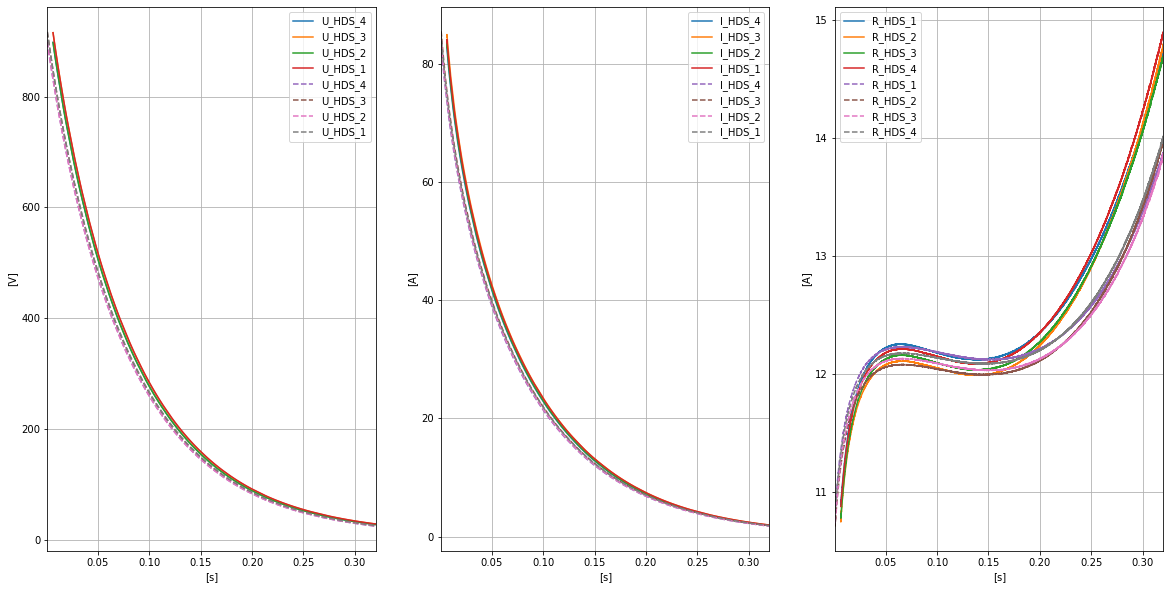

In [11]:
QuenchHeaterAnalysis.plot_qh_discharge(circuit_type, qh_sync_decay_df, qh_ref_sync_decay_df)

# 5. Calculate Features

In [16]:
features_qh = QuenchHeaterAnalysis.calculate_qh_discharge_features(circuit_type, circuit_name, qh_sync_decay_df, timestamp_qh)
features_qh_ref = QuenchHeaterAnalysis.calculate_qh_discharge_features(circuit_type, circuit_name, qh_ref_sync_decay_df, timestamp_qh_ref)
features_qh_concat = pd.concat([features_qh, features_qh_ref], axis=0)
features_qh_concat

U_HDS_1_tau  U_HDS_2_tau  U_HDS_3_tau  U_HDS_4_tau  \
1544631694793000000     0.082406     0.081872     0.082141     0.081999   
1417018658713000000     0.082039     0.081576     0.081745     0.081656   

                     I_HDS_1_tau  I_HDS_2_tau  I_HDS_3_tau  I_HDS_4_tau  \
1544631694793000000     0.073685     0.073113     0.073172     0.073252   
1417018658713000000     0.073539     0.073011     0.073119     0.073304   

                     R_HDS_1_initial  R_HDS_2_initial  R_HDS_3_initial  \
1544631694793000000        10.901456        10.774483        10.786475   
1417018658713000000        10.860866        10.737804        10.745000   

                     R_HDS_4_initial  
1544631694793000000        10.887141  
1417018658713000000        10.838139

# 6. Rate Discharge

In [20]:
is_discharge_correct = QuenchHeaterAnalysis.rate_qh_discharge(circuit_type, features_qh_concat)
is_discharge_correct

True